# Outlier Detection Part 1

### Types of Outliers:


1. By Mistake


2. Natural Variation

### Flow :

1. Outlier Detection


2. Analyse why it is in data (By mistake or Natural)


3. Outiler Treatment

### Impact of Outliers


1. Impact on statistical measures


2. Impact on model performance


3. Assumption Violation


4. Data Visualization


5. Data Preprocessing

### How to deal with Outliers : 


1. Removal


2. Capping


3. Discretization

## Outlier Detection Techniques : 

### Univariate technique : (Column wise)

1. Z-Score


2. IQR



### Multivariate technique : (Row wise)

1. Isolation


2. One class SVM


3. Local Outlier Factor

# 1. Univariate Outlier Techniques : 

## 1.1. Z-Score Outlier Detection and Removal (Normally Distributed) :

<center>When distribution of data is close to Normal Distribution</center>


$$Anything\;outside\;(\mu\;+\;3 \sigma)\;and\;(\mu\;-\;3\sigma)\;should\;be\;considered\;an\;Outlier$$

### Assumptions:

Column should be normally distributed or normal like distribution


$$Z-score\;(x_{i}^{'})\;=\;\frac{x_{i}-\mu}{\sigma}$$
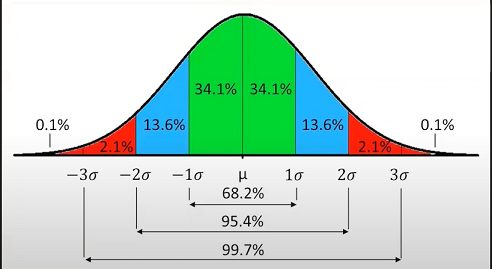

#### The leftover 0.03% points can be considered as Outliers. Anything beyond $(\mu\;+\;3\sigma)$ and $(\mu\;-\;3\sigma)$

### Outlier treatment:

- Trimming : but if outliers are too many, there is risk of information loss


- Capping : capping all the values outside the 99.7% with the upper and lower limit numbers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.shape

(1000, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


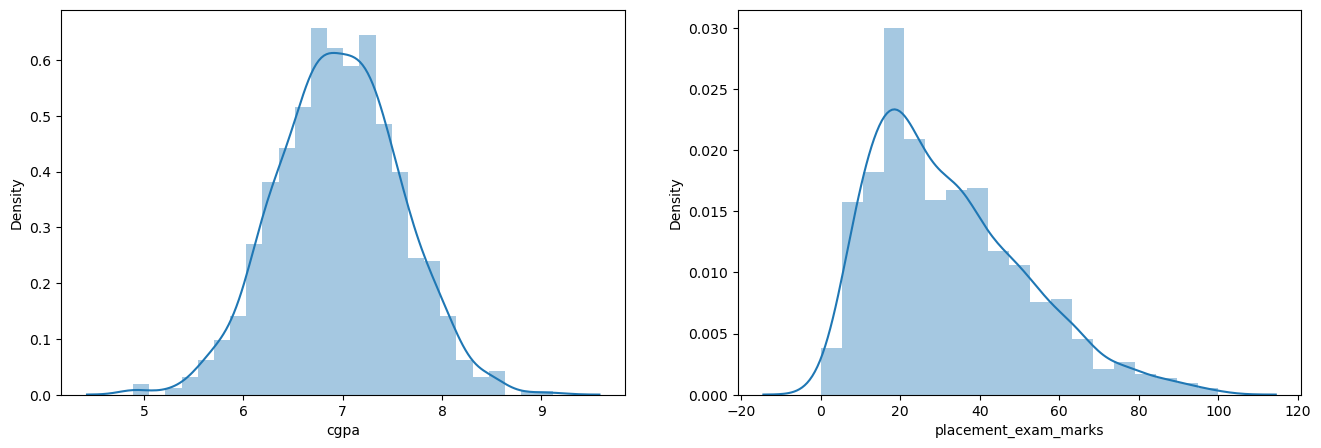

In [4]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [5]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [6]:
df['cgpa'].skew()

-0.014529938929314918

In [7]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124000000001
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [8]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397177
Lowest allowed 5.113546374602842


### Finding the outliers :

In [9]:
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### Trimming (by mistake data points): 

In [10]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [11]:
df.shape, new_df.shape

((1000, 3), (995, 3))

### Approach 2: Calculating Z-score and then trimming

In [12]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [13]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [14]:
df[df['cgpa_zscore'] > 3] # crossing upper limit

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [15]:
df[df['cgpa_zscore'] < -3] # crossing lower limit

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [16]:
# outliers

df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [17]:
# Trimming

new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [18]:
new_df.shape

(995, 4)

### Capping :  

- if any value is greater than upper limit then cap the value to upper limit.


- if any value is lower than lower limit then cap the value to lower limit.

In [19]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [20]:
upper_limit, lower_limit

(8.808933625397177, 5.113546374602842)

In [21]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [22]:
# where clause: np.where(condition, if true then replacement, if false then what to do)

df['cgpa'] = np.where(df['cgpa']>upper_limit,upper_limit,
    np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa'])
)

In [23]:
df.shape

(1000, 4)

In [24]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

## 1.2. IQR Method Outlier Detection and Removal (Skewed Distributed)

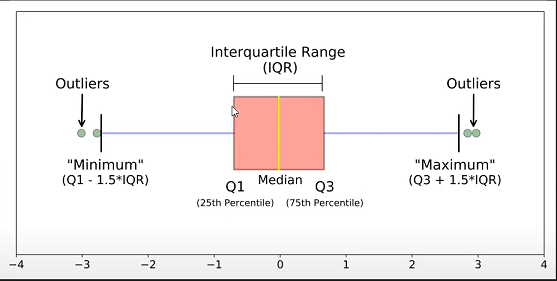

- Applied when the data is skewed or not normal. We need to calculate 25th percentile, 50th percentile (median) and 75th percentile values.


#### Minimum limit = Q1 - 1.5 IQR
#### Maximum limit = Q3 + 1.5 IQR

### Applying IQR :

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [27]:
df.shape

(1000, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


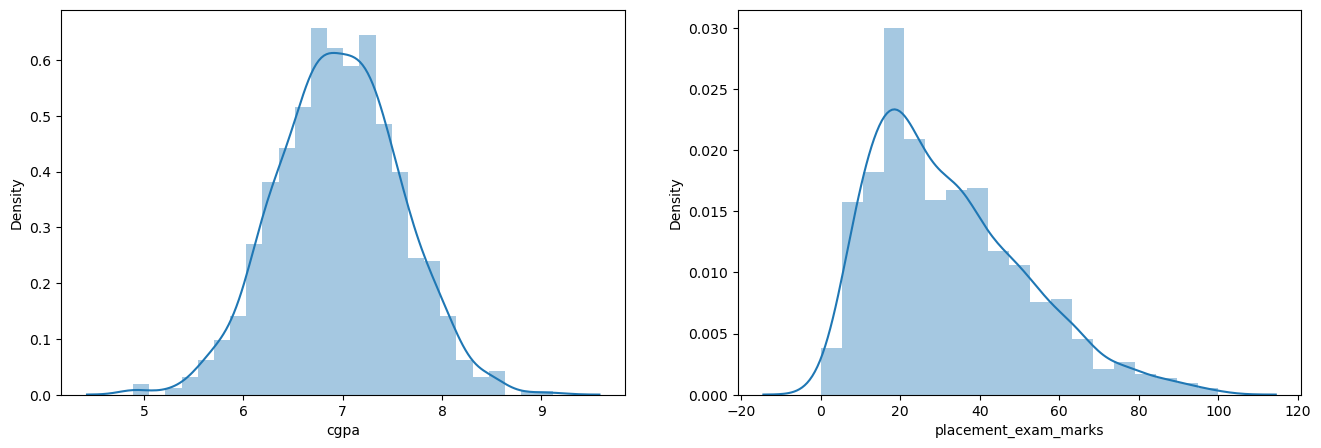

In [28]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [29]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

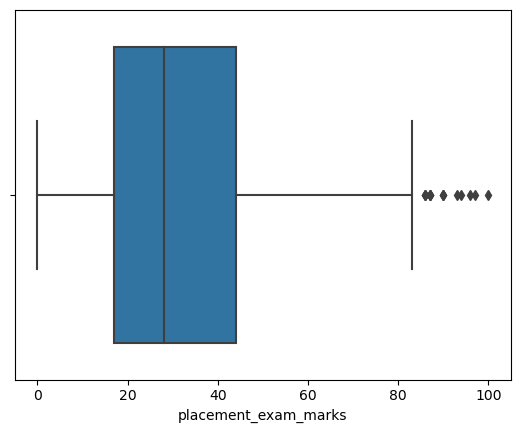

In [30]:
sns.boxplot(df['placement_exam_marks'])

#### There are outliers in data : 

In [31]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [32]:
percentile25, percentile75

(17.0, 44.0)

In [33]:
iqr = percentile75 - percentile25
iqr

27.0

In [34]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [35]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


### Finding Outliers

In [36]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [37]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


### Trimming

In [38]:
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df.shape

(985, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

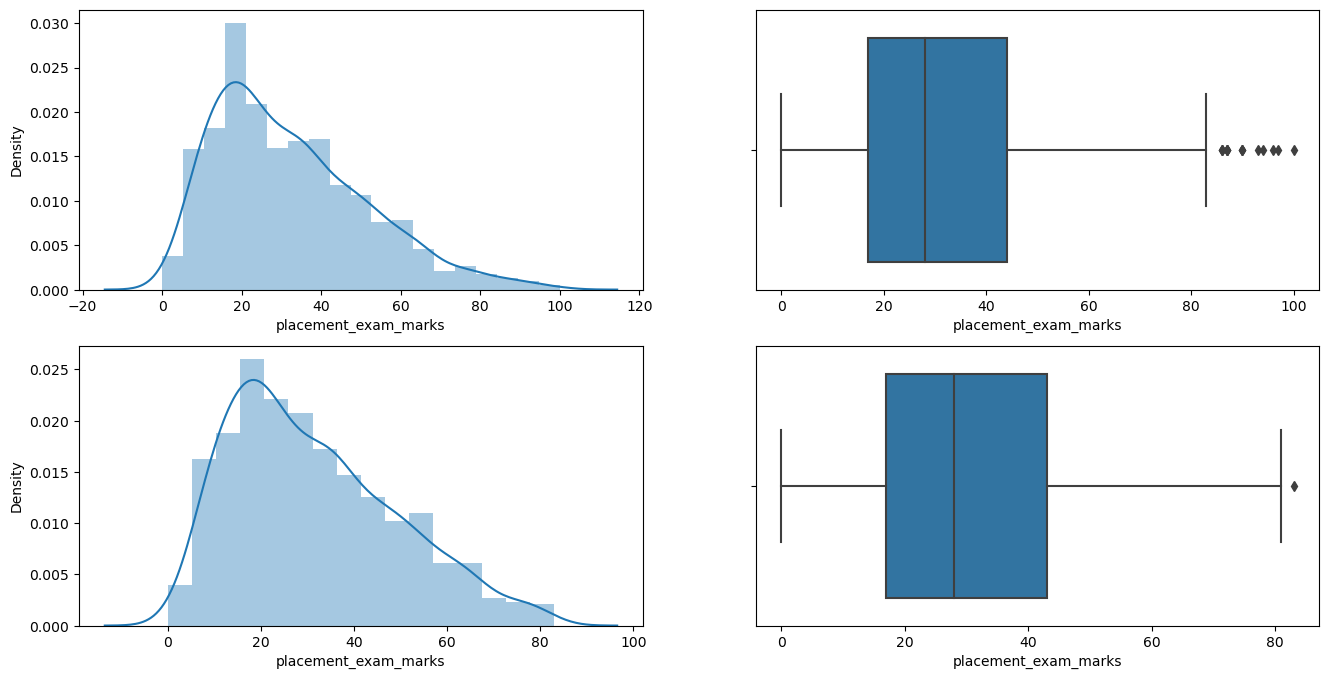

In [39]:
# Comparing before and after trimming

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

### Capping

In [40]:
new_df_cap = df.copy()
new_df.shape

(985, 3)

In [41]:
# np.where(condtion,true,false)

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

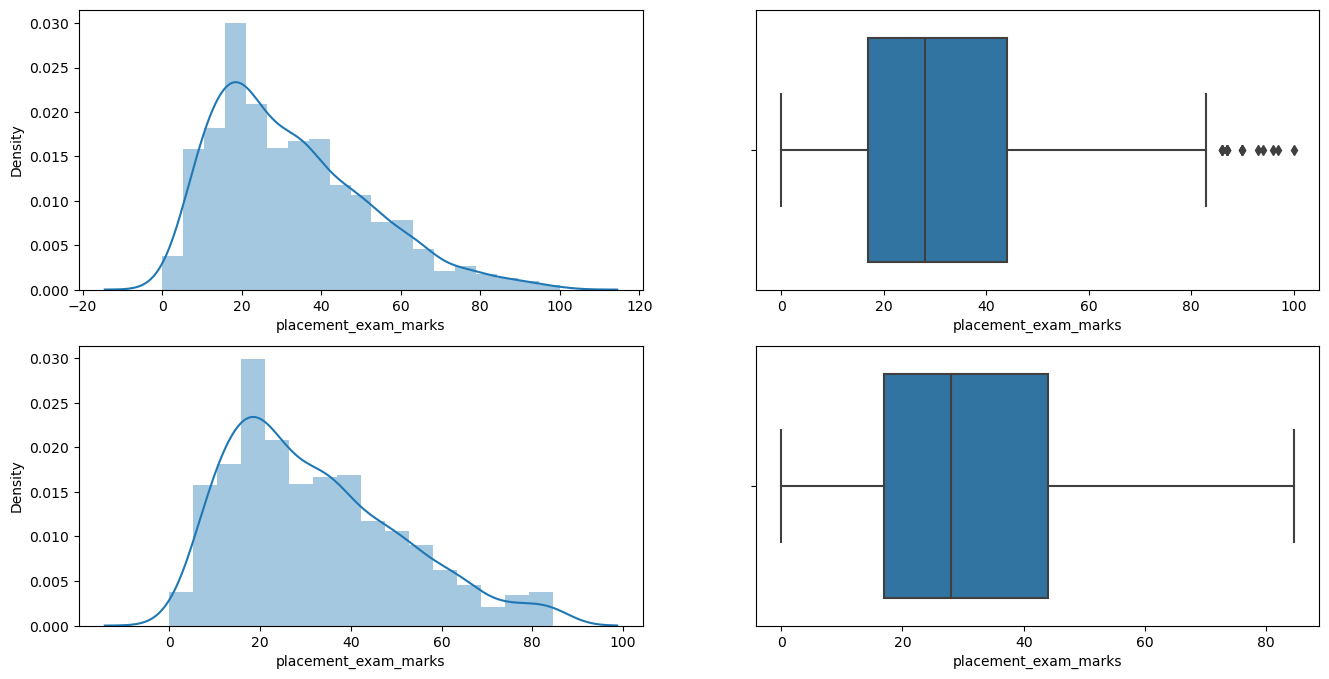

In [42]:
# Comparing before and after capping

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

#### Tail became heavy due to capping as there are many values there.

## 1.3. Percentile Method

generally people take 99 percentile to 1 percentile as range

__Note: Upper percentile which is left should be equal to lower percentile which is left__ eg: (99,1), (98,2), (95,5)

<br></br>
<center>Sum of upper limit + lower limit = 100</center>



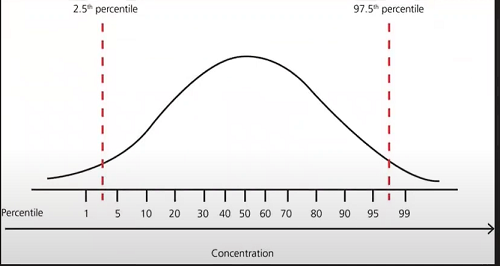

##### 3. Percentile based approach

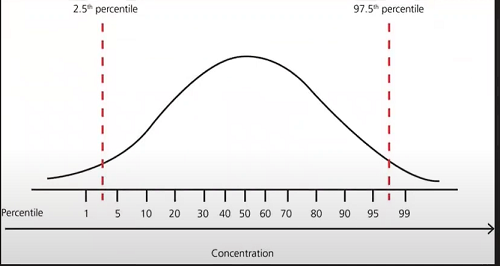

In [45]:
import numpy as np
import pandas as pd

In [76]:
df = pd.read_csv('weight-height.csv')

In [77]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [78]:
df.shape

(10000, 3)

In [79]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [80]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

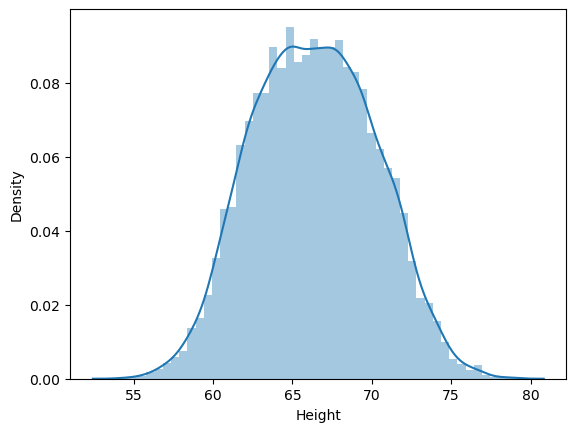

In [81]:
sns.distplot(df['Height'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

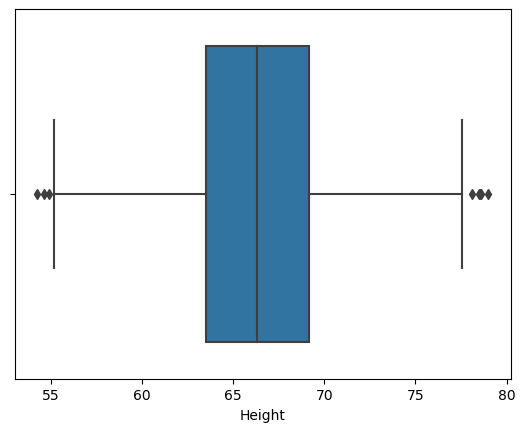

In [82]:
sns.boxplot(df['Height'])

In [83]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [84]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

#### Trimming

In [85]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [86]:
new_df.shape

(9799, 3)

In [87]:
new_df.describe()

,Height,Weight
count,9799.000000,9799.000000
mean,66.363507,161.391522
std,3.644267,30.925072
min,58.134496,77.523774
25%,63.577147,136.320936
50%,66.317899,161.201891
75%,69.119859,186.747036
max,74.767447,249.946283


In [88]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

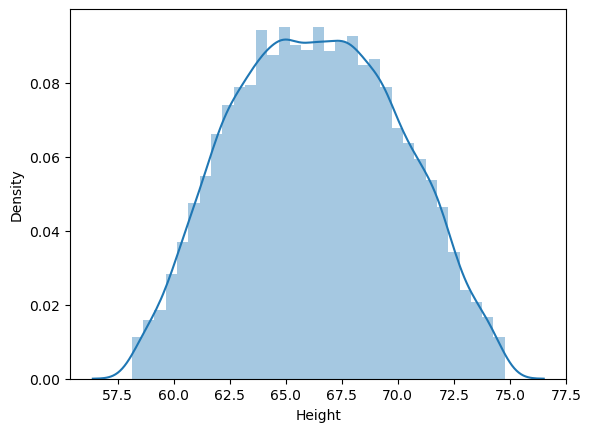

In [89]:
sns.distplot(new_df['Height'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

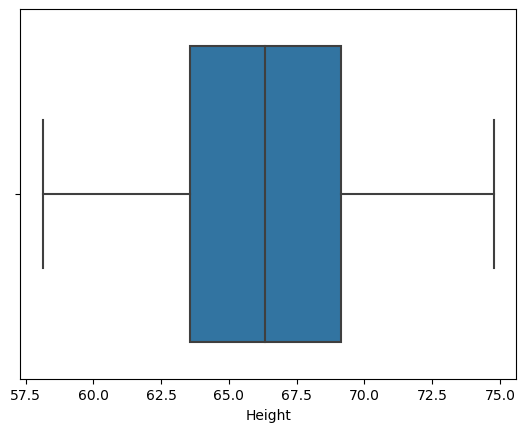

In [90]:
sns.boxplot(new_df['Height'])

#### Capping

In [91]:
# Capping --> Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [92]:
df.shape

(10000, 3)

In [93]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

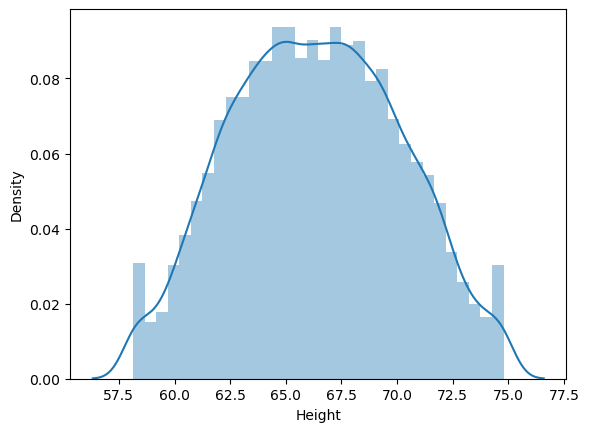

In [94]:
sns.distplot(df['Height'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

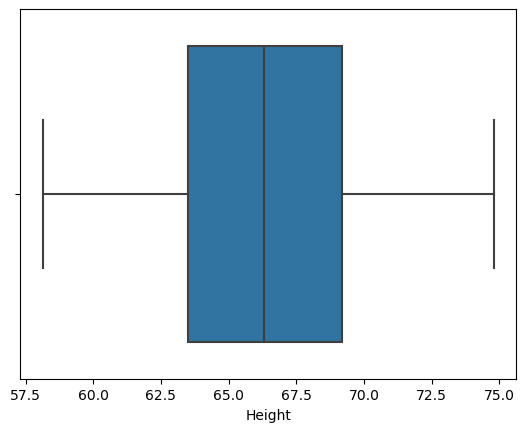

In [95]:
sns.boxplot(df['Height'])

## Problem with Univariate Techniques:


__Feature Interaction between columns is not evaluated using univariate.__

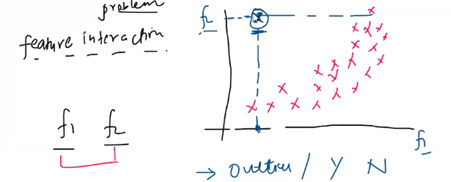

# 2. Multivariate Outlier Techniques : 

## 2.1. Isolation Forest 

- __sklearn.ensemble.IsolationForest__



- Used for Anamoly Detection


- Isolation Forest is an ensemble method based on __decision trees__ that isolates outliers by randomly partitioning the data space and identifying observations that require fewer partitions to be isolated.


- less cuts is needed to seperate outliers as outliers will be on __higher nodes__


- more cuts is needed to sepearte non-outliers as points will be on __lower nodes__



- Uses Extra Tree (Extremely randomized Trees) as estimator which doesnot requires output to decide the cuts.  We decide how many trees we want.



- __In Extra cut trees we make Random cuts based on random columns. That's why it is unsupervised as we donot need "y" column for gini impurity or entropy.__ Randomly features are selected to be split. __In Extra tree everything happens randomly.__



- Cuts will keep on happening till all points are seperated. Many such trees will be made with random point sampling. It may happen that due to sampling, each point is not present in every tree.



- Every point is given an __Anomaly score__ based on what level of tree the point is present and in how many trees the point is present. We take average of all scores for every points.


- Lowest Anamoloy scores will be the rows with outliers.

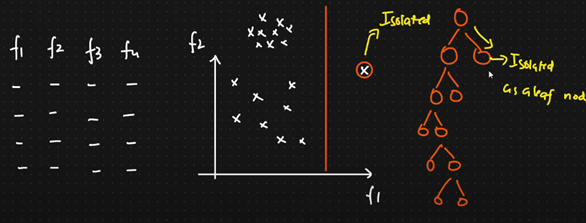

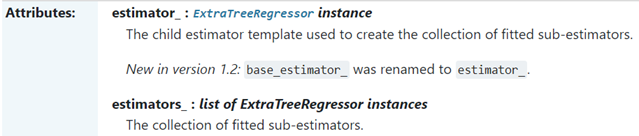

Isolation Forest is an anomaly detection algorithm that works by isolating outliers in a dataset using decision trees. Here's an explanation of how Isolation Forest works in steps:

1. **Random Subsampling:**
   
   Isolation Forest randomly selects a subset of the data points from the dataset. This subset is used to build isolation trees. The random subsampling helps in efficiently isolating outliers from the rest of the data.


2. **Building Isolation Trees:**
   
   Isolation Forest constructs isolation trees (also known as isolation trees) recursively. Each isolation tree is built as follows:

   a. __Random Feature Selection :__ At each node of the tree, a random feature is selected from the subset of features.

   b. __Random Split :__ A random value within the range of the selected feature is chosen as the splitting value to partition the data.

   c. __Recursive Partitioning :__ The data is partitioned into two subsets based on the selected feature and split value. This process continues recursively until each subset contains only a single data point or a predefined maximum depth is reached.



3. **Path Length Calculation:**
   
   For each data point, Isolation Forest calculates the path length required to isolate the data point in each isolation tree. The path length is the number of edges traversed from the root node to isolate the data point.



4. **Outlier Score Calculation:**
   
   The outlier score for each data point is computed based on the average path length across all isolation trees. Intuitively, outliers are expected to have shorter average path lengths since they require fewer partitions to isolate.



5. **Thresholding:**
   
   Finally, a threshold is applied to the outlier scores to classify data points as outliers or inliers. Data points with outlier scores above the threshold are considered outliers, while those below the threshold are considered inliers.



6. **Output:**
   
   The algorithm outputs a binary classification indicating whether each data point is an outlier or an inlier.

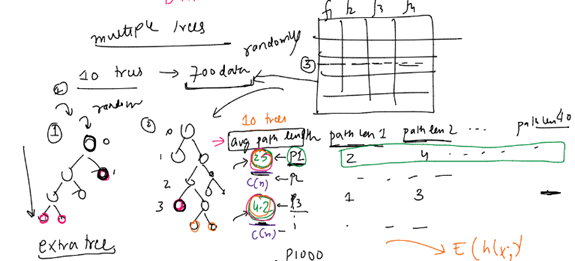

### Calculation of Anomaly Score

$$\text{anomaly score}\;\neq\;\text{average path length}$$

### Formula : 

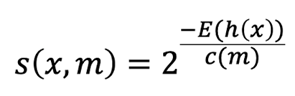

- h(x) is path length of a point in a tree.

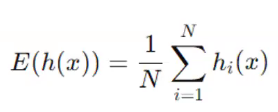

- E(h(x)) is the __Average path length__ of a point along all trees.

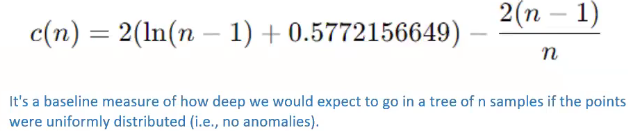

- n is number of total data points


- c(n) is approx height of the tree with n samples (baseline).


- after raise it to the negative power of 2, The __Anomaly score will always lie between [0,1]__ giving it exponential nature.



- ___if anamoly score = 1 then, outlier.___


- ___if anamoly score = 0.5 then, neither inlier nor outlier.___


- ___if anamoly score = 0 then, inlier.___

#### Contamination score : 
> __if contamination score = 0.1, then we want top 10% anamoly score points.__ 

### Key Points:
- Isolation Forest exploits the principle that outliers are easier to isolate than normal data points in high-dimensional spaces.


- The algorithm is efficient and can handle large datasets with high-dimensional features.


- By using random subsampling and random feature selection, Isolation Forest reduces the computational complexity of building isolation trees.


- Isolation Forest does not require the assumption of the underlying data distribution, making it suitable for various types of data.

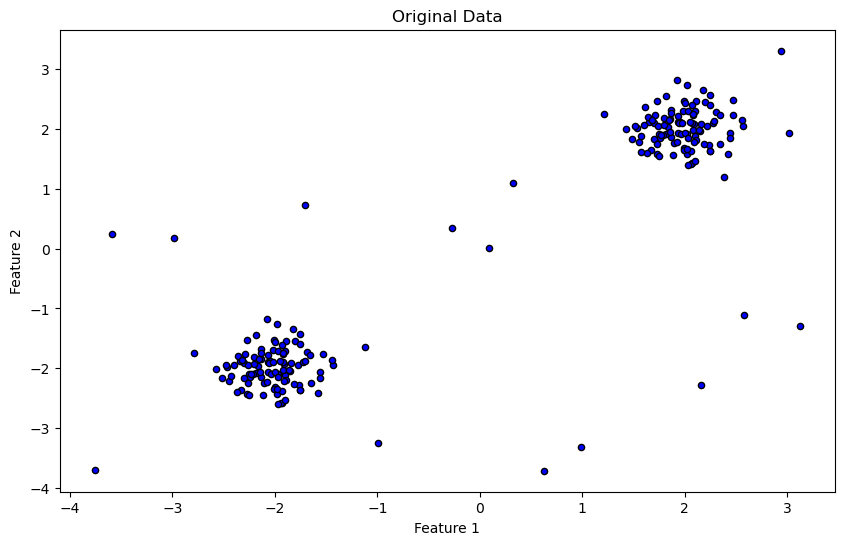

In [96]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Generating a sample 2D dataset
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# Combine the datasets
X = np.r_[X_train, X_outliers]

# Plotting the dataset before outlier detection
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], color='b', s=20, edgecolor='k')
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



In [97]:
# Fit the model
clf = IsolationForest(max_samples=100, random_state=rng, contamination='auto')
clf.fit(X)
y_pred = clf.predict(X)


In [98]:
y_pred

# 1 is outlier
# -1 is not an outlier

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

#### gives negative of the anamoly score : 

In [99]:
clf.score_samples(X)

array([-0.4150876 , -0.47280663, -0.41240545, -0.4821969 , -0.40096936,
       -0.40942865, -0.46646703, -0.49206591, -0.41587151, -0.45289276,
       -0.47318204, -0.43660416, -0.40279112, -0.42581089, -0.40681209,
       -0.48796357, -0.42017964, -0.45319263, -0.46812032, -0.44344699,
       -0.42782874, -0.40897581, -0.46595917, -0.4351456 , -0.45406973,
       -0.40295997, -0.4059808 , -0.46621039, -0.41392589, -0.43034699,
       -0.4087553 , -0.45042347, -0.47579758, -0.42941338, -0.41243517,
       -0.45845622, -0.45474565, -0.55668368, -0.40510743, -0.46654577,
       -0.40291344, -0.48080457, -0.41816602, -0.43440765, -0.40468325,
       -0.4252439 , -0.41072405, -0.45317532, -0.40426194, -0.40617457,
       -0.45481543, -0.41833185, -0.40367683, -0.51204603, -0.41064612,
       -0.49503604, -0.52784811, -0.40112833, -0.42306254, -0.46558963,
       -0.44646143, -0.50412269, -0.5280767 , -0.4246619 , -0.40514328,
       -0.46842696, -0.42359279, -0.47131257, -0.4122756 , -0.45

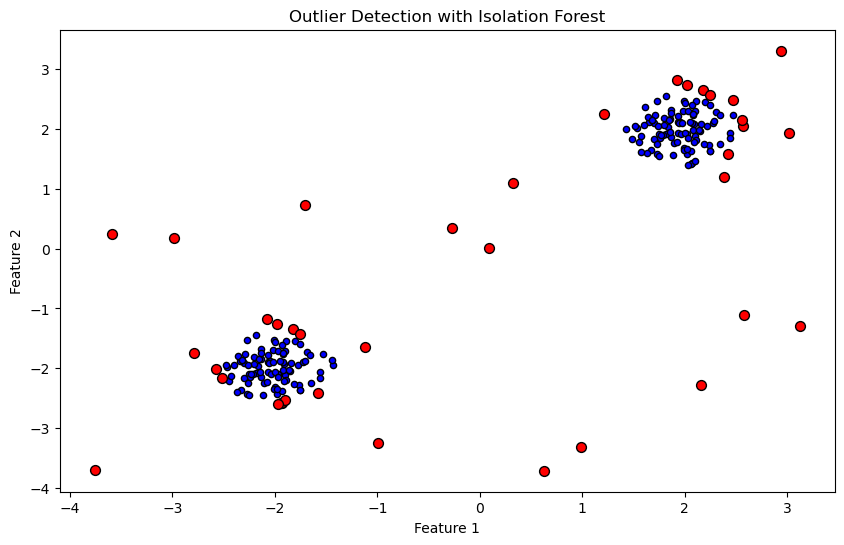

In [100]:
# Visualizing the data points and the outliers detected
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], color='b', s=20, edgecolor='k')

# Highlighting the outliers
is_outlier = y_pred == -1
plt.scatter(X[is_outlier, 0], X[is_outlier, 1], color='r', s=50, edgecolor='k')

plt.title("Outlier Detection with Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## 2.2 KNN for Outlier Detection:

- calculate average distance point to the neighbors. Number of neigbours depends on value of k.


- The points with highest Average value will be outlier.

### Local vs Global Outliers : 

- Global outliers are True Outliers which is based on Entire dataset.


- Local outliers are outliers which doesnot fit based on a particular group inside the data. 

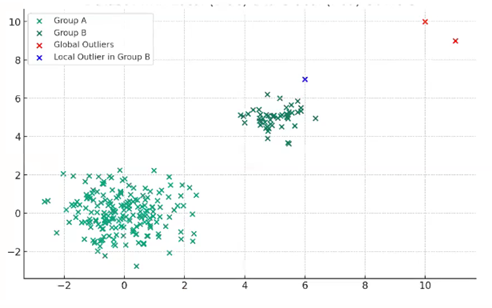

### Failure of KNN


- Doesnot works well when there are local Outliers in the data.


- Depends on Dense region and sparse region ie. Density. Use Local Outlier Factor instead.

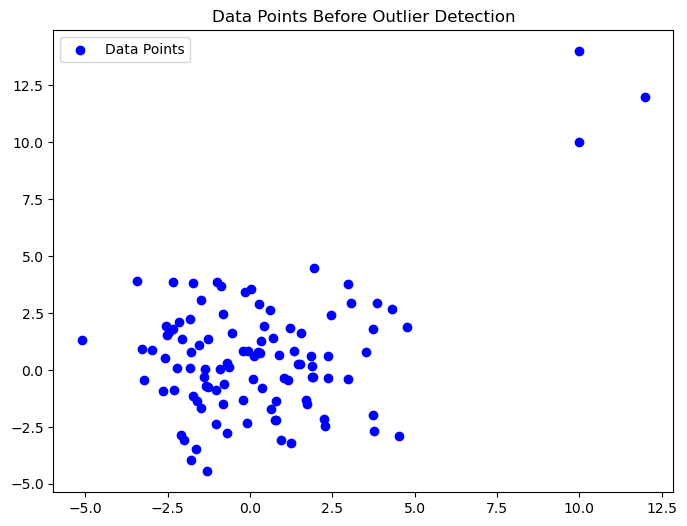

In [101]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Generating more sample data
np.random.seed(0)
X_normal = np.random.randn(100, 2) * 2
X_outliers = np.array([[10, 10], [12, 12], [10, 14]])
X = np.concatenate([X_normal, X_outliers], axis=0)

# Plot the data before outlier detection
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Data Points')
plt.title('Data Points Before Outlier Detection')
plt.legend()
plt.show()


#### when  k = 2

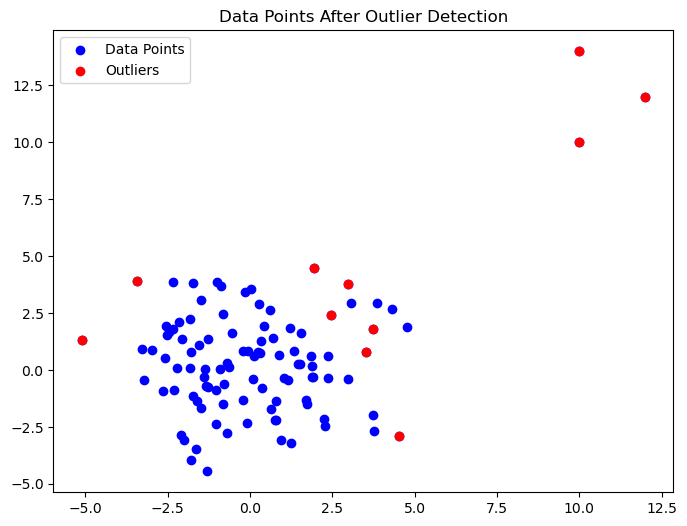

In [102]:
# Set the number of neighbors
k = 2

# Fit the model
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X)
distances, indices = nbrs.kneighbors(X)

# Calculate the outlier score
outlier_scores = np.mean(distances[:, 1:], axis=1)

# Determine a threshold
threshold = np.percentile(outlier_scores, 90)  # using the 95th percentile as the threshold

# Identify outliers
outlier_indices = np.where(outlier_scores > threshold)[0]
outliers = X[outlier_indices]

# Plot the data after outlier detection
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Data Points')
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers')
plt.title('Data Points After Outlier Detection')
plt.legend()
plt.show()

#### when  k = 5 :

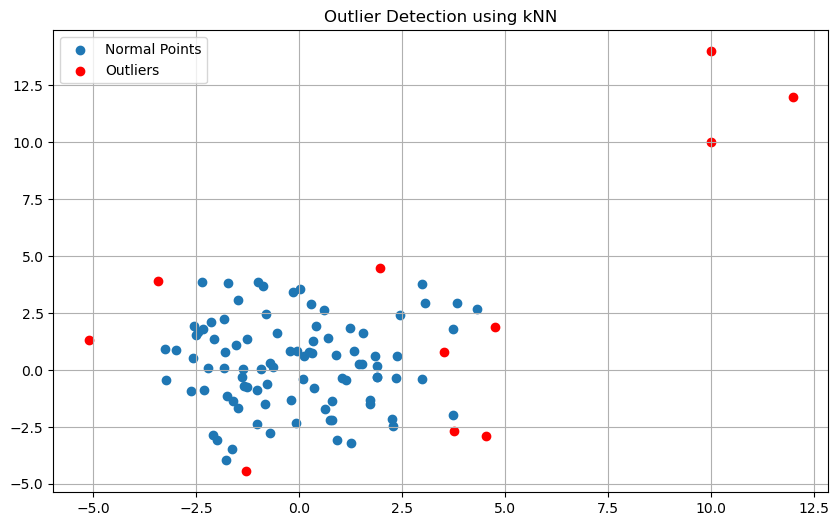

In [103]:
from sklearn.neighbors import NearestNeighbors

# Number of neighbors
k = 5

# Fit the model
nbrs = NearestNeighbors(n_neighbors=k + 1).fit(X)
distances, indices = nbrs.kneighbors(X)

# Compute the average distance to k nearest neighbors as the outlier score
outlier_scores = np.mean(distances[:, 1:], axis=1)

# Determine a threshold for outlier detection
# Here, we use the 95th percentile as the threshold
threshold = np.percentile(outlier_scores, 90)

# Points with a score above the threshold are considered outliers
is_outlier = outlier_scores > threshold

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X[~is_outlier, 0], X[~is_outlier, 1], label='Normal Points')
plt.scatter(X[is_outlier, 0], X[is_outlier, 1], color='r', label='Outliers')
plt.title('Outlier Detection using kNN')
plt.legend()
plt.grid(True)
plt.show()


## 2.3. Local Outlier Factor (LOF)

- Works on Density near a point.


- LOF measures the local density deviation of a data point with respect to its neighbors. Observations with significantly lower local density compared to their neighbors are considered outliers.


- The anomaly score of each sample is called the Local Outlier Factor. It measures the local deviation of the density of a given sample with respect to its neighbors. 


- It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. 


- By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.

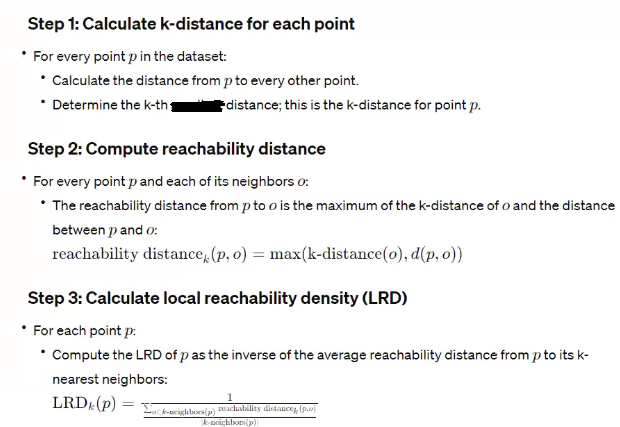

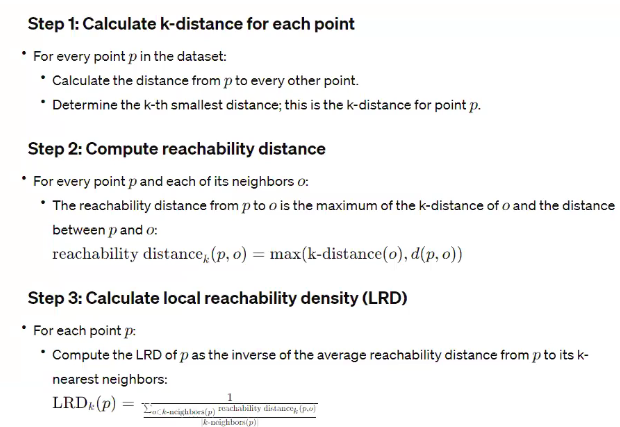

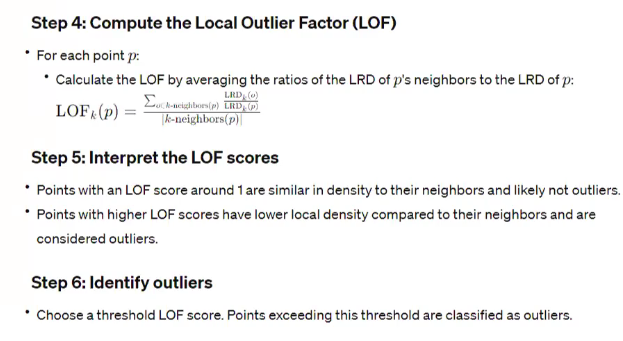

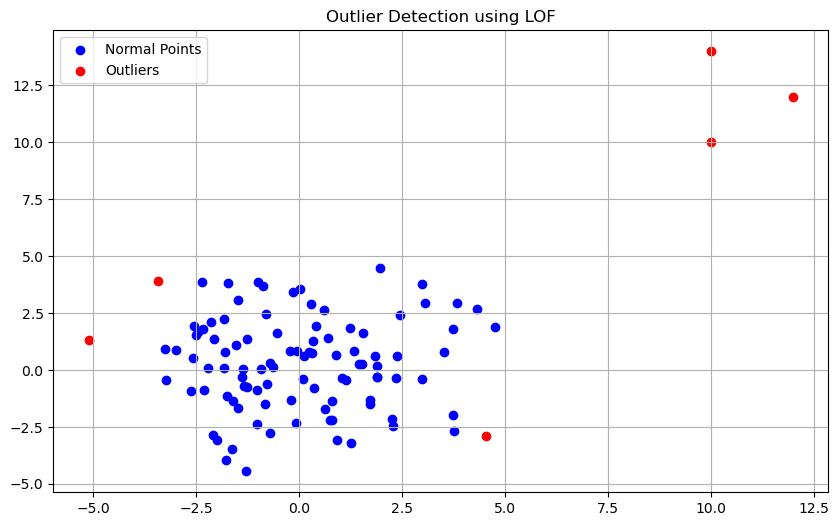

In [105]:
from sklearn.neighbors import LocalOutlierFactor

# Applying LOF
clf_lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05)
y_pred_lof = clf_lof.fit_predict(X)
lof_scores = -clf_lof.negative_outlier_factor_  # Inverting the negative LOF scores for better interpretation

# Identifying the outliers based on the LOF prediction
is_outlier_lof = y_pred_lof == -1

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X[~is_outlier_lof, 0], X[~is_outlier_lof, 1], color='blue', label='Normal Points')
plt.scatter(X[is_outlier_lof, 0], X[is_outlier_lof, 1], color='red', label='Outliers')
plt.title('Outlier Detection using LOF')
plt.legend()
plt.grid(True)
plt.show()


## 2.4. DBSCAN

In [104]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN to the dataset
dbscan = DBSCAN(eps=0.4, min_samples=7)  # These parameters can be adjusted
clusters = dbscan.fit_predict(data)

# Identifying the outliers
outliers = data[clusters == -1]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Data Points', s=10)
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers', s=10)
plt.title('Outlier Detection using DBSCAN')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'data' is not defined

## 2.5. One class SVM

## Comparison

| Feature/Technique      | Z-Score Technique                | IQR and Box Plot Method         | Isolation Forest                | KNN (k-Nearest Neighbors)      | LOF (Local Outlier Factor)     | DBSCAN (Density-Based Spatial Clustering of Applications with Noise) |
|------------------------|----------------------------------|---------------------------------|---------------------------------|--------------------------------|--------------------------------|---------------------------------------------------------------------|
| **Method Type**        | Statistical                     | Statistical                     | Ensemble Method                 | Distance-Based                 | Density-Based                  | Density-Based                                                       |
| **Approach**           | Standard deviation and mean     | Quartiles and median            | Random forest isolation         | Nearest neighbors distance     | Local density comparison       | Density-based clustering                                            |
| **Key Parameters**     | Threshold for Z-score (e.g., 3) | IQR multiplier (typically 1.5)  | Number of trees, path length    | Number of neighbors (k)        | Number of neighbors (k), radius | Epsilon (eps), MinPts                                              |
| **Sensitivity**        | Very sensitive to outliers      | Moderately sensitive            | Robust to outliers              | Sensitive to local outliers    | Sensitive to local density     | Sensitive to density variations                                     |
| **Scalability**        | Very scalable                   | Very scalable                   | Good scalability                | Poor with large datasets       | Poor with large datasets       | Poor with large datasets                                            |
| **Best Use Case**      | Gaussian-distributed data       | Non-Gaussian, not too skewed    | High-dimensional, mixed feature types | Small, low-dimensional datasets | Varying density clusters      | Spatial data with clear density gaps                                |
| **Interpretability**   | Very interpretable              | Highly interpretable            | Less interpretable              | Moderately interpretable       | Less interpretable             | Moderately interpretable                                            |
| **Advantages**         | Easy to understand and implement| Easy to understand, robust to mild outliers | Handles large feature sets well| Intuitive, effective in many scenarios | Effective in detecting outliers in varying density data | Good at identifying clusters and noise                              |
| **Disadvantages**      | Assumes normality, not good for multimodal data | Can miss outliers in a skewed distribution | Requires parameter tuning, complex | Sensitive to k, not good for high-dimensional data | Requires parameter tuning, complex | Parameters eps and MinPts can be hard to set, not ideal for high-dimensional data |
| **Output**             | Binary classification (inlier/outlier) | Binary classification (inlier/outlier) | Outlier score (continuous)     | Binary classification or score | Outlier score (continuous)     | Cluster labels (including noise)                                    |
| **Model Type**         | Unsupervised                    | Unsupervised                    | Unsupervised                    | Unsupervised or semi-supervised| Unsupervised                    | Unsupervised                                                        |
| **Data Assumption**    | Assumes feature independence    | Assumes feature independence    | No assumption on data structure | Assumes local similarity       | Assumes local similarity       | Assumes clusters are dense regions of points                        |
| **Robustness**         | Not robust to skewed data       | More robust than Z-score        | Robust to isolated noise        | Moderate robustness            | Robust to local density changes| Robust to cluster shape variations                                  |
